Look at the Tubulin 1 data from the SMLM comparison challenge

In [5]:
import os 
import numpy as np
from PIL import Image
# --- LocaHBay ---
from locahbay import util as UT

In [13]:
import matplotlib as mpl 
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

In [16]:
# read in tubulin frame
dir_tub = os.path.join(UT.dat_dir(), 'tub1') # tubulin directory
f_frame = os.path.join(dir_tub, '02385.tif')

im = Image.open(f_frame)
imarr = np.array(im)

In [32]:
# read in ground truth 
f_truth = os.path.join(dir_tub, 'fluoro_truth', 'frames', '02385.csv')
x, y, z, I = np.loadtxt(f_truth, delimiter=',', skiprows=1, unpack=True, usecols=[2,3,4,5]) # positions in nm
print('%i fluorophores' % len(x))
# convert to pixels
xpix, ypix = x/150., y/150.

50 fluorophores


In [33]:
print I

[2254.61 1002.42 1583.36 1832.76 1735.53  517.05 1214.11 2366.92 1183.69
 1621.15 1611.33 2343.06  705.71 2320.04  994.96 1493.26  822.99 2075.34
 2915.49 1289.44 2389.89  651.72  835.72  980.07  807.64 2278.34 1263.59
 2230.77 1932.46 2065.41 1343.24 1682.95 1541.12 1690.58 1730.21  937.31
  503.11  659.59 1910.07 1845.    724.29 1974.5  1956.4  1483.58 1912.05
 1394.57 1712.7  2108.89 1413.28 1902.11]


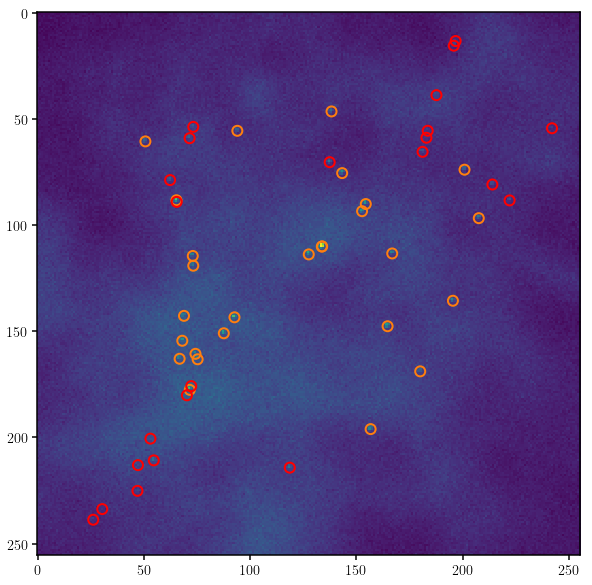

In [39]:
fig = plt.figure(figsize=(10,10))
plt.imshow(imarr)
high = (I > np.average(I))
plt.scatter(xpix[high], ypix[high], s=100, facecolors='none', edgecolor='C1', linewidths=2)
low = (I <= np.average(I))
plt.scatter(xpix[low], ypix[low], s=100, facecolors='none', edgecolor='r', linewidths=2)